# Geometric Operations and Other Mathematical Tools with OpenCV

# Spatial Operations in Image Processing

Spatial operations use pixels in a neighborhood to determine the present pixel value. Applications include filtering and sharpening. They are used in many steps in computer vision like segmentation and are a key building block in Artificial Intelligence algorithms.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

# Linear Filtering

Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.

[[[141 153 165]
  [138 150 162]
  [135 147 159]
  ...
  [158 211 248]
  [167 220 255]
  [167 220 255]]

 [[140 152 164]
  [137 149 161]
  [133 145 157]
  ...
  [158 211 248]
  [165 218 255]
  [165 218 255]]

 [[137 149 161]
  [134 146 158]
  [131 143 155]
  ...
  [159 212 249]
  [163 216 253]
  [163 216 253]]

 ...

 [[ 95  95  95]
  [ 93  93  93]
  [111 111 111]
  ...
  [ 93 106 122]
  [109 123 141]
  [100 114 132]]

 [[100 100 100]
  [104 104 104]
  [109 109 109]
  ...
  [105 118 134]
  [130 144 162]
  [121 135 153]]

 [[ 97  97  97]
  [105 105 105]
  [103 103 103]
  ...
  [135 148 164]
  [136 150 168]
  [127 141 159]]]


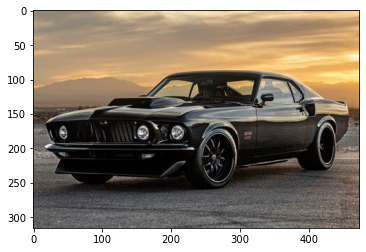

In [5]:
image = cv2.imread('429.jpeg')
print(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

The images we are working with are comprised of RGB values which are values from 0 to 255. Zero means white noise, this makes the image look grainy:

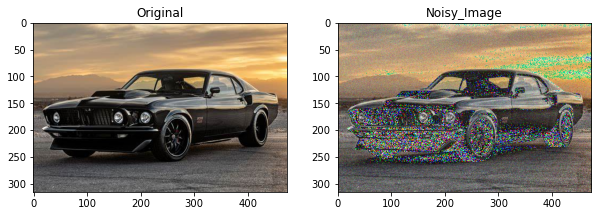

In [7]:
rows, cols,_ = image.shape

noise= np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image = image+noise
plot_image(image,noisy_image, title_1="Original",title_2="Noisy_Image")

## Filtering Noise

Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the kernel simply averages out the kernels in a neighborhood.

In [8]:
kernel = np.ones((6,6))/36

The function filter2D performs 2D convolution between the image src and the kernel on each color channel independently. The parameter ddepth has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

In [9]:
image_filtered = cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)

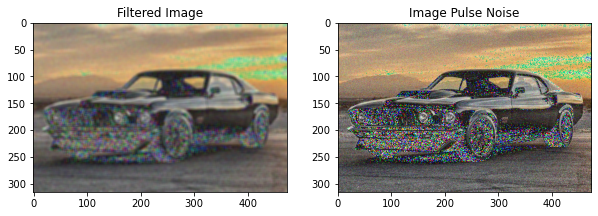

In [10]:
plot_image(image_filtered,noisy_image,title_1="Filtered Image",title_2="Image Pulse Noise")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 4x4 kernel

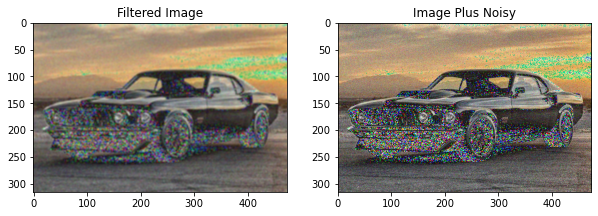

In [12]:
kernel = np.ones((4,4))/16
image_filtered = cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)
plot_image(image_filtered,noisy_image,title_1="Filtered Image",title_2="Image Plus Noisy")

## Gaussian Blur

The function GaussianBlur convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:

Parameters

src input image; the image can have any number of channels, which are processed independently

ksize: Gaussian kernel size

sigmaX Gaussian kernel standard deviation in the X direction

sigmaY Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX

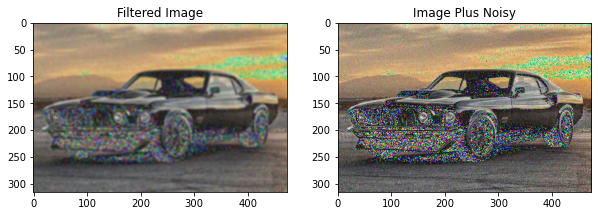

In [13]:
image_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(image_filtered,noisy_image,title_1="Filtered Image",title_2="Image Plus Noisy")

Sigma behaves like the size of the mean filter, a larger value of sigma will make the image blurry, but you are still constrained by the size of the filter, there we set sigma to 10

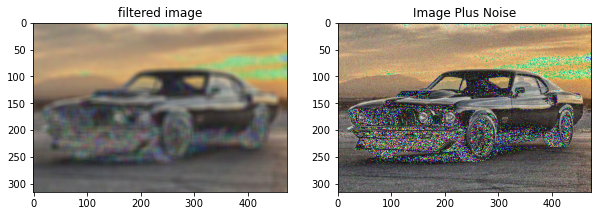

In [14]:
# Filters the images using GaussianBlur on the image with noise using a 11 by 11 kernel 
image_filtered = cv2.GaussianBlur(noisy_image,(11,11),sigmaX=10,sigmaY=10)
# Plots the Filtered Image then the Unfiltered Image with Noise
plot_image(image_filtered , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

## Image Sharpening

Image Sharpening involves smoothing the image and calculating the derivatives. We can accomplish image sharpening by applying the following Kernel.

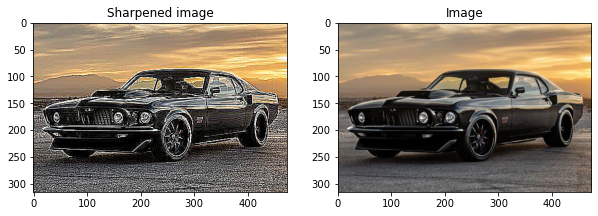

In [15]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

## Edges

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let’s use the Sobel edge detector. This combines several convolutions and finding the magnitude of the result. Consider the following image:

[[155 152 149 ... 216 225 225]
 [154 151 147 ... 216 223 223]
 [151 148 145 ... 217 221 221]
 ...
 [ 95  93 111 ... 109 127 118]
 [100 104 109 ... 121 148 139]
 [ 97 105 103 ... 151 154 145]]


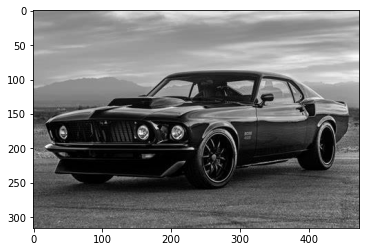

In [16]:
# Loads the image from the specified file
img_gray = cv2.imread('429.jpeg', cv2.IMREAD_GRAYSCALE)
print(img_gray)
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray ,cmap='gray')

We smooth the image, this decreases changes that may be caused by noise that would  affect the gradient.


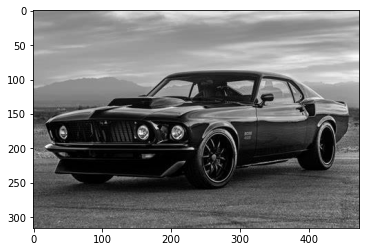

In [17]:
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
# Renders the filtered image
plt.imshow(img_gray ,cmap='gray')

In [18]:
ddepth = cv2.CV_16S
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)

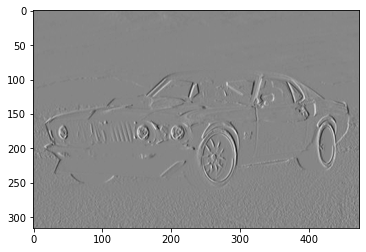

In [19]:
plt.imshow(grad_x,cmap='gray')

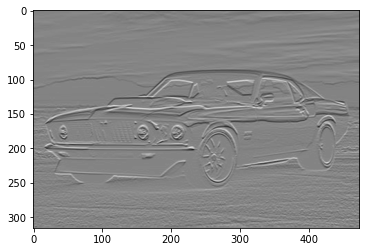

In [20]:
# Applys the filter on the image in the X direction
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y,cmap='gray')

In [21]:
# Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

In [22]:
# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

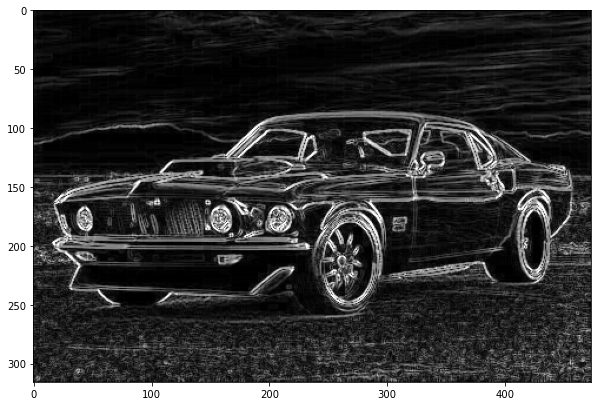

In [23]:
# Make the figure bigger and renders the image
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

## Median

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value.

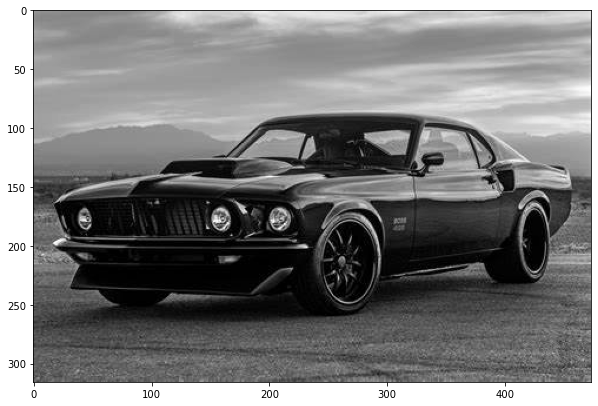

In [24]:
# Load the camera man image
image = cv2.imread("429.jpeg",cv2.IMREAD_GRAYSCALE)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

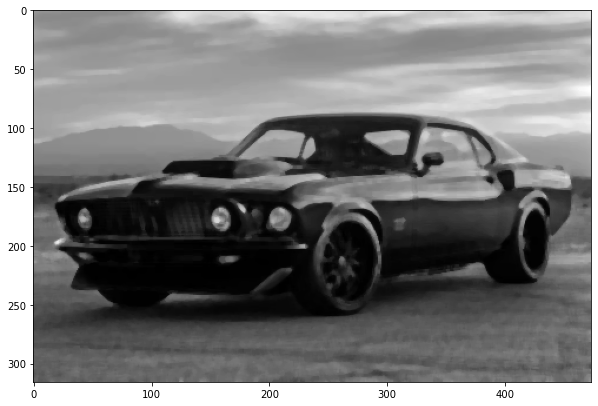

In [25]:
# Filter the image using Median Blur with a kernel of size 5
filtered_image = cv2.medianBlur(image, 5)
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(filtered_image,cmap="gray")

## Threshold Function Parameters

src: The image to use thresh: The threshold maxval: The maxval to use type: Type of filtering

The threshold function works by looking at each pixel's grayscale value and assigning a value if it is below the threshold and another value if it is above the threshold. In our example the threshold is 0 (black) and the type is binary inverse so if a value is above the threshold the assigned value is 0 (black) and if it is below or equals the threshold the maxval 255 (white) is used. So if the pixel is 0 black it is assigned 255 (white) and if the pixel is not black then it is assigned black which is what THRESH_BINARY_INV tells OpenCV to do. This is how it would work without THRESH_OTSU.

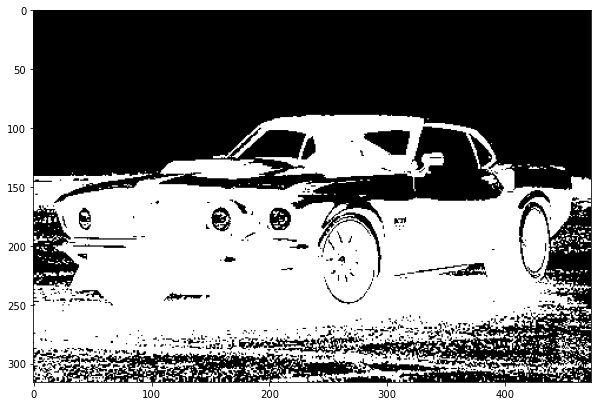

In [26]:
# Returns ret which is the threshold used and outs which is the image
ret, outs = cv2.threshold(src = image, thresh = 0, maxval = 255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

# Make the image larger when it renders
plt.figure(figsize=(10,10))

# Render the image
plt.imshow(outs, cmap='gray')